# EGFR Bioactivity Data Pulling, Curation, and Analysis

These series of notebooks retrieve IC50 bioactivity data for the EGFR target from ChEMBL, preprocesses it, classifies compounds by activity thresholds, checks SMILES formatting, and performs basic EDAs and sanity checks.

In [1]:
# Install ChEMBL client
!pip install chembl_webresource_client

In [2]:
# Imports
import pandas as pd
import re
from chembl_webresource_client.new_client import new_client

In [4]:
# 1. Search for EGFR target
target = new_client.target
targets = pd.DataFrame.from_dict(target.search('EGFR'))
display(targets)

# Select the first matching target_chembl_id
selected_target = targets['target_chembl_id'].iloc[4]
print('Selected target ID:', selected_target)

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Mus musculus,Epidermal growth factor receptor erbB1,16.0,False,CHEMBL3608,"[{'accession': 'Q01279', 'component_descriptio...",SINGLE PROTEIN,10090
1,[],Homo sapiens,EGFR/PPP1CA,16.0,False,CHEMBL4523747,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
2,[],Homo sapiens,VHL/EGFR,16.0,False,CHEMBL4523998,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
3,[],Homo sapiens,CCN2-EGFR,16.0,False,CHEMBL5465557,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
4,[],Homo sapiens,Epidermal growth factor receptor erbB1,12.0,False,CHEMBL203,"[{'accession': 'P00533', 'component_descriptio...",SINGLE PROTEIN,9606
5,[],Homo sapiens,Protein cereblon/Epidermal growth factor receptor,12.0,False,CHEMBL4523680,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
6,[],Homo sapiens,Epidermal growth factor receptor,11.0,False,CHEMBL2363049,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
7,[],Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,10.0,False,CHEMBL2111431,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
8,[],Homo sapiens,MER intracellular domain/EGFR extracellular do...,10.0,False,CHEMBL3137284,"[{'accession': 'P00533', 'component_descriptio...",CHIMERIC PROTEIN,9606
9,[],Homo sapiens,ErbB-2/ErbB-3 heterodimer,10.0,False,CHEMBL4630723,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN COMPLEX,9606


Selected target ID: CHEMBL203


In [5]:
# 2. Pull IC50 activity data
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')
df = pd.DataFrame.from_dict(res)
df.to_csv('EGFR_01_bioactivity_data_raw.csv', index=False)
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
4,None,None,32270,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.04


In [6]:
# 3. Preprocess data
# Remove missing values
df2 = df[df.standard_value.notna()]
df2 = df2[df2.canonical_smiles.notna()]
# Drop duplicates based on SMILES
df2_nr = df2.drop_duplicates(['canonical_smiles'])
# Select relevant columns
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3.to_csv('EGFR_02_bioactivity_data_preprocessed.csv', index=False)
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0
6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0
7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0
8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0


In [7]:
# 4. Classify by activity threshold
df4 = pd.read_csv('EGFR_02_bioactivity_data_preprocessed.csv')

# Define classification
def classify_ic50(value):
    v = float(value)
    if v >= 10000:
        return 'inactive'
    elif v <= 500:
        return 'active'
    else:
        return 'intermediate'

# Apply and save
df4['class'] = df4.standard_value.apply(classify_ic50)
df4.to_csv('EGFR_03_bioactivity_data_curated.csv', index=False)
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0,active
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0,active
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0,intermediate
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0,inactive
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0,inactive


### Check if smiles is poorly formatted

In [8]:
# 5. Check poorly formatted SMILES
def check_smiles_format(df, column_name):
    """
    Check if the SMILES strings in the specified DataFrame column are poorly formatted.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the SMILES strings.
    column_name (str): The name of the column containing the SMILES strings.
    
    Returns:
    pd.DataFrame: A DataFrame with an additional column 'is_poorly_formatted' indicating poor formatting.
    """
    def is_poorly_formatted(smiles):
        if not smiles:
            return True
        if smiles.count('[') != smiles.count(']'):
            return True
        if smiles.count('(') != smiles.count(')'):
            return True
        if '.' in smiles or smiles.startswith('.') or smiles.endswith('.'):
            return True
        return False
    df['is_poorly_formatted'] = df[column_name].apply(is_poorly_formatted)
    return df[df['is_poorly_formatted']]

df_curated = pd.read_csv('EGFR_03_bioactivity_data_curated.csv')
poor_smiles = check_smiles_format(df_curated, 'canonical_smiles')
print('Poorly formatted SMILES:')
poor_smiles

Poorly formatted SMILES:


,molecule_chembl_id,canonical_smiles,standard_value,class,is_poorly_formatted
156,CHEMBL545315,C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN...,1.5,active,True
431,CHEMBL2448064,COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCC1CCNCC1.Cl,300.0,active,True
483,CHEMBL1744349,COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OC/C=C/CN1CCCC...,90.0,active,True
485,CHEMBL2448065,COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCC1CCN(C)CC1.Cl,300.0,active,True
497,CHEMBL2448067,COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCCCN1CCCC1.Cl,100.0,active,True
...,...,...,...,...,...
8783,CHEMBL4782900,COc1ccc(-c2c3c4cc(O)c(OCCCN(C)C)cc4[nH]c(=O)c3...,24.7,active,True
8784,CHEMBL4750158,COc1ccc(-c2c3c4cc(OCCCN(C)C)c(O)cc4[nH]c(=O)c3...,23.6,active,True
8785,CHEMBL4791596,COc1ccc(-c2c3c4cc(OCCCN(C)C)c(OCCCN(C)C)cc4[nH...,4.6,active,True
9493,CHEMBL2105712,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...,1437.0,intermediate,True


Class distribution:
class
active          5529
intermediate    2454
inactive        2091
Name: count, dtype: int64


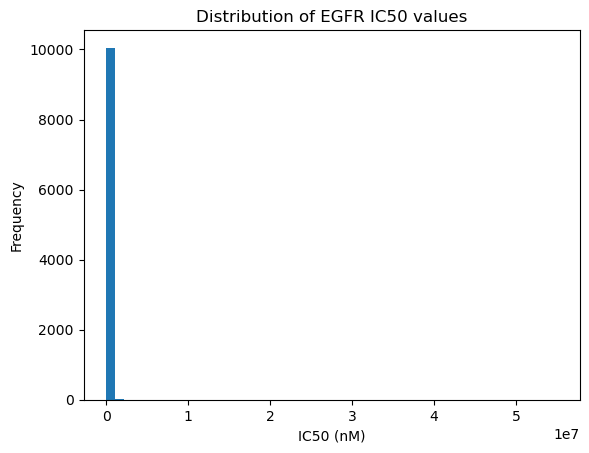

In [9]:
# 6. Basic analysis
# Load curated data
df5 = df_curated
# Class distribution
distribution = df5['class'].value_counts()
print('Class distribution:')
print(distribution)

# IC50 distribution plot
import matplotlib.pyplot as plt
plt.hist(df5['standard_value'].astype(float), bins=50)
plt.title('Distribution of EGFR IC50 values')
plt.xlabel('IC50 (nM)')
plt.ylabel('Frequency')
plt.show()